In [6]:
import geopandas as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
import warnings
warnings.filterwarnings('ignore')

In [7]:
chicago_shp = '../data_misc/chicago_shapefile/geo_export_2702d908-a4db-4dc5-a4de-78a5f3f67445.shp'
chicago_shp = '../data_misc/chicago_shapefile/geo_export_ec346dbb-8c11-44b4-be04-0301ae3f9c64.shp'
chicago = gp.read_file(chicago_shp)
chicago.geoid10 = chicago.geoid10.apply(np.int64)

In [8]:
chicago['center'] = chicago.geometry.centroid
chicago

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,center
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",POINT (-87.63004 41.74248)
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",POINT (-87.68188 41.83209)
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852...",POINT (-87.63510 41.85101)
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856...",POINT (-87.68334 41.85556)
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874...",POINT (-87.63140 41.87104)
...,...,...,...,...,...,...,...,...,...,...,...
796,7,7.0,031,17031070400,704,Census Tract 704,None,17,070400,"POLYGON ((-87.65746 41.93258, -87.65722 41.932...",POINT (-87.65616 41.92897)
797,7,7.0,031,17031070500,705,Census Tract 705,None,17,070500,"POLYGON ((-87.66349 41.93036, -87.66350 41.930...",POINT (-87.66089 41.92895)
798,13,13.0,031,17031130300,1303,Census Tract 1303,None,17,130300,"POLYGON ((-87.71436 41.98300, -87.71472 41.982...",POINT (-87.71339 41.98656)
799,29,29.0,031,17031292200,2922,Census Tract 2922,None,17,292200,"POLYGON ((-87.71317 41.85523, -87.71357 41.855...",POINT (-87.71571 41.85665)


In [38]:
chicago.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
# get the centroid of each community area
coords_dict = {'commarea':[],
               'latitude':[],
               'longitude':[]}
chicago_areas = chicago.copy().groupby('commarea')
frames = []
for i, a in enumerate(chicago_areas.groups):
#     if i > 0:
#         break
    area_df = chicago_areas.get_group(a)
    centroid = area_df.dissolve().centroid
    coords_dict['commarea'].append(a)
    coords_dict['latitude'].append(centroid.y[0])
    coords_dict['longitude'].append(centroid.x[0])
    area_df['center_x'] = centroid.x[0]
    area_df['center_y'] = centroid.y[0]
    frames.append(area_df)

chicago_copy = pd.concat(frames, axis=0)
chicago_copy

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,center,center_x,center_y
44,1,1.0,031,17031010701,107.01,Census Tract 107.01,None,17,010701,"POLYGON ((-87.67541 42.01139, -87.67541 42.011...",POINT (-87.67862 42.00915),-87.668505,42.009251
48,1,1.0,031,17031010502,105.02,Census Tract 105.02,None,17,010502,"POLYGON ((-87.66572 42.00498, -87.66573 42.005...",POINT (-87.66333 42.00452),-87.668505,42.009251
49,1,1.0,031,17031010503,105.03,Census Tract 105.03,None,17,010503,"POLYGON ((-87.66241 41.99817, -87.66279 41.998...",POINT (-87.66313 42.00032),-87.668505,42.009251
50,1,1.0,031,17031010702,107.02,Census Tract 107.02,None,17,010702,"POLYGON ((-87.67540 42.01088, -87.67541 42.011...",POINT (-87.67273 42.00902),-87.668505,42.009251
53,1,1.0,031,17031010201,102.01,Census Tract 102.01,None,17,010201,"POLYGON ((-87.68010 42.01254, -87.68027 42.012...",POINT (-87.68015 42.01601),-87.668505,42.009251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,8,8.0,031,17031081600,816,Census Tract 816,None,17,081600,"POLYGON ((-87.62959 41.88923, -87.62959 41.889...",POINT (-87.62887 41.89211),-87.628479,41.898894
680,8,8.0,031,17031081700,817,Census Tract 817,None,17,081700,"POLYGON ((-87.62961 41.89004, -87.62960 41.889...",POINT (-87.63187 41.89207),-87.628479,41.898894
661,9,9.0,031,17031090100,901,Census Tract 901,None,17,090100,"POLYGON ((-87.82007 42.01411, -87.82007 42.015...",POINT (-87.81358 42.01526),-87.813902,42.007560
662,9,9.0,031,17031090200,902,Census Tract 902,Partially outside City Boundary,17,090200,"POLYGON ((-87.80675 42.00151, -87.80675 42.001...",POINT (-87.81322 42.00560),-87.813902,42.007560


In [47]:
type(chicago_copy)

geopandas.geodataframe.GeoDataFrame

In [48]:
chicago_copy['area_center'] = gp.points_from_xy(chicago_copy.center_x, 
                                                chicago_copy.center_y, 
                                                crs={'init': 'epsg:4326'})
chicago_copy.head()

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,center,center_x,center_y,area_center
44,1,1.0,031,17031010701,107.01,Census Tract 107.01,None,17,010701,"POLYGON ((-87.67541 42.01139, -87.67541 42.011...",POINT (-87.67862 42.00915),-87.668505,42.009251,POINT (-87.66850 42.00925)
48,1,1.0,031,17031010502,105.02,Census Tract 105.02,None,17,010502,"POLYGON ((-87.66572 42.00498, -87.66573 42.005...",POINT (-87.66333 42.00452),-87.668505,42.009251,POINT (-87.66850 42.00925)
49,1,1.0,031,17031010503,105.03,Census Tract 105.03,None,17,010503,"POLYGON ((-87.66241 41.99817, -87.66279 41.998...",POINT (-87.66313 42.00032),-87.668505,42.009251,POINT (-87.66850 42.00925)
50,1,1.0,031,17031010702,107.02,Census Tract 107.02,None,17,010702,"POLYGON ((-87.67540 42.01088, -87.67541 42.011...",POINT (-87.67273 42.00902),-87.668505,42.009251,POINT (-87.66850 42.00925)
53,1,1.0,031,17031010201,102.01,Census Tract 102.01,None,17,010201,"POLYGON ((-87.68010 42.01254, -87.68027 42.012...",POINT (-87.68015 42.01601),-87.668505,42.009251,POINT (-87.66850 42.00925)


<AxesSubplot:>

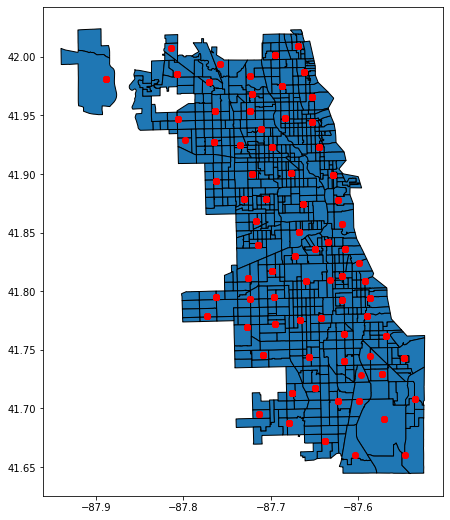

In [49]:
ax = chicago_copy.plot(edgecolor='k')
chicago_copy.area_center.plot(ax=ax, color='r')

In [51]:
commarea_centers = pd.DataFrame(coords_dict)
commarea_centers.to_csv('commarea_centers.csv')

In [55]:
77*21

1617

In [54]:
commarea_centers

,commarea,latitude,longitude
0,1,42.009251,-87.668505
1,10,41.985692,-87.807240
2,11,41.978826,-87.771156
3,12,41.993971,-87.758418
4,13,41.983601,-87.723573
...,...,...,...
72,75,41.687250,-87.678556
73,76,41.981046,-87.888195
74,77,41.987051,-87.661653
75,8,41.898894,-87.628479


In [52]:
len(commarea_centers)

77

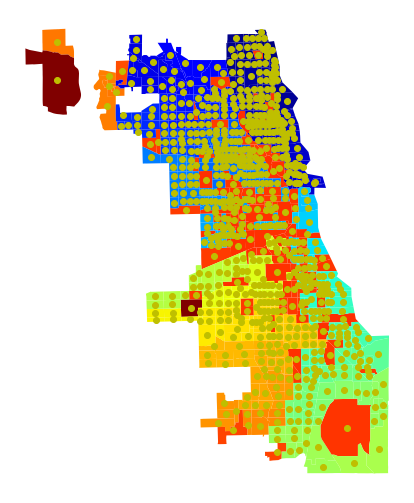

In [4]:
fig, ax = plt.subplots()
chicago.plot(ax=ax, column='geoid10', cmap='jet')
chicago.center.plot(ax=ax, color='y')
ax.set_axis_off()
plt.show()

In [5]:
google_sunroof = '../data_misc/project-sunroof-census_tract.csv'
google_df = pd.read_csv(google_sunroof,                     
                        usecols=['region_name',
                                 'state_name',
                                 'percent_qualified',
                                 'number_of_panels_total',
                                 'kw_total',
                                 'existing_installs_count'])
google_df.rename(columns={'region_name':'geoid10'}, inplace=True)
google_df.head()

,geoid10,state_name,percent_qualified,number_of_panels_total,kw_total,existing_installs_count
0,1001020100,Alabama,76.853056,39080.0,9770.00,0.0
1,1001020200,Alabama,73.190622,59054.0,14763.50,0.0
2,1001020300,Alabama,78.611501,80364.0,20091.00,1.0
3,1001020400,Alabama,78.308824,94598.0,23649.50,0.0
4,1001020500,Alabama,97.941432,276925.0,69231.25,8.0


In [33]:
chicago_sun = pd.merge(chicago, google_df, on=['geoid10'])
chicago_sun.head()

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,center,state_name,percent_qualified,number_of_panels_total,kw_total,existing_installs_count
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",POINT (-87.63004 41.74248),Illinois,84.905660,85235.0,21308.75,2.0
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",POINT (-87.68188 41.83209),Illinois,91.343964,40389.0,10097.25,0.0
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852...",POINT (-87.63510 41.85101),Illinois,80.890337,58826.0,14706.50,0.0
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856...",POINT (-87.68334 41.85556),Illinois,74.908648,32879.0,8219.75,1.0
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874...",POINT (-87.63140 41.87104),Illinois,89.795918,28169.0,7042.25,1.0


In [40]:
chicago_sun.commarea.unique()

array(['44', '59', '34', '31', '32', '28', '65', '53', '76', '77', '2',
       '54', '29', '8', '7', '3', '67', '68', '16', '14', '35', '15',
       '42', '4', '27', '6', '1', '21', '19', '60', '25', '22', '20',
       '61', '58', '56', '38', '23', '5', '66', '24', '63', '39', '69',
       '30', '11', '45', '18', '43', '41', '73', '40', '13', '46', '51',
       '49', '37', '33', '70', '64', '36', '50', '74', '75', '17', '47',
       '48', '71', '52', '10', '72', '57', '55', '26', '9', '12', '62'],
      dtype=object)

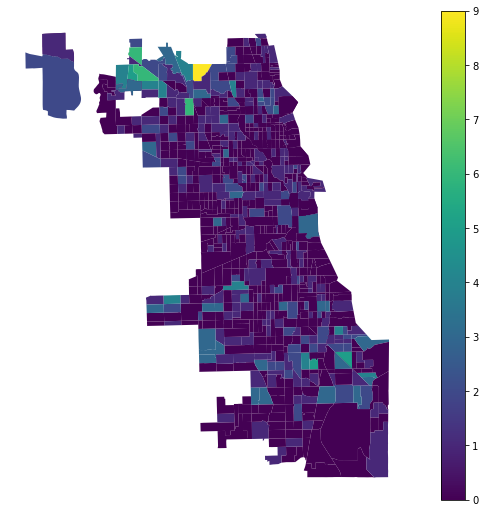

In [37]:
fig, ax = plt.subplots()
chicago_sun.plot(ax=ax, column='existing_installs_count', cmap='viridis', legend=True)
# chicago.center.plot(ax=ax, color='y')
ax.set_axis_off()
plt.show()

In [47]:
econ_data = 'Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv'
chicago_econ = pd.read_csv(econ_data)
print(chicago_econ.columns)
chicago_econ.rename(columns={'Community Area Number':'commarea_n'}, inplace=True)
chicago_econ.head()

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')


,commarea_n,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [48]:
chi_econ_df = pd.merge(chicago_sun, chicago_econ, on=['commarea_n'])
chi_econ_df

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,...,kw_total,existing_installs_count,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",...,21308.75,2.0,Chatham,3.3,27.8,24.0,14.5,40.3,18881,60.0
1,44,44.0,031,17031440201,4402.01,Census Tract 4402.01,None,17,440201,"POLYGON ((-87.61235 41.74568, -87.61234 41.745...",...,NaN,0.0,Chatham,3.3,27.8,24.0,14.5,40.3,18881,60.0
2,44,44.0,031,17031440201,4402.01,Census Tract 4402.01,None,17,440201,"POLYGON ((-87.61235 41.74568, -87.61234 41.745...",...,7240.25,0.0,Chatham,3.3,27.8,24.0,14.5,40.3,18881,60.0
3,44,44.0,031,17031440202,4402.02,Census Tract 4402.02,None,17,440202,"POLYGON ((-87.60852 41.73660, -87.60875 41.736...",...,9407.75,5.0,Chatham,3.3,27.8,24.0,14.5,40.3,18881,60.0
4,44,44.0,031,17031440102,4401.02,Census Tract 4401.02,None,17,440102,"POLYGON ((-87.59956 41.74540, -87.59890 41.745...",...,8337.00,0.0,Chatham,3.3,27.8,24.0,14.5,40.3,18881,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,12,12.0,031,17031120200,1202,Census Tract 1202,None,17,120200,"POLYGON ((-87.74884 41.98364, -87.74906 41.983...",...,13873.50,4.0,Forest Glen,1.1,7.5,6.8,4.9,40.5,44164,11.0
841,62,62.0,031,17031620300,6203,Census Tract 6203,None,17,620300,"POLYGON ((-87.72310 41.79094, -87.72309 41.790...",...,10158.25,3.0,West Elsdon,11.1,15.6,16.7,37.0,37.7,15754,69.0
842,62,62.0,031,17031620400,6204,Census Tract 6204,None,17,620400,"POLYGON ((-87.71312 41.78609, -87.71326 41.786...",...,8237.75,3.0,West Elsdon,11.1,15.6,16.7,37.0,37.7,15754,69.0
843,62,62.0,031,17031620100,6201,Census Tract 6201,None,17,620100,"POLYGON ((-87.71347 41.79565, -87.71347 41.795...",...,8694.75,1.0,West Elsdon,11.1,15.6,16.7,37.0,37.7,15754,69.0


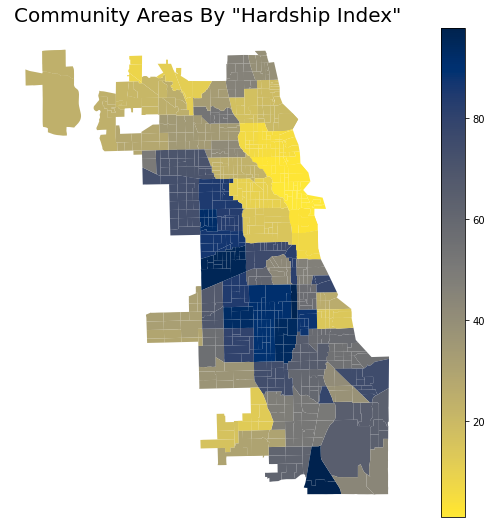

In [66]:
fig, ax = plt.subplots()
chi_econ_df.plot(ax=ax, column='HARDSHIP INDEX', cmap='cividis_r', legend=True)
# chicago.center.plot(ax=ax, color='y')
ax.set_title('Community Areas By \"Hardship Index\"',fontsize=20)
ax.set_axis_off()
plt.show()

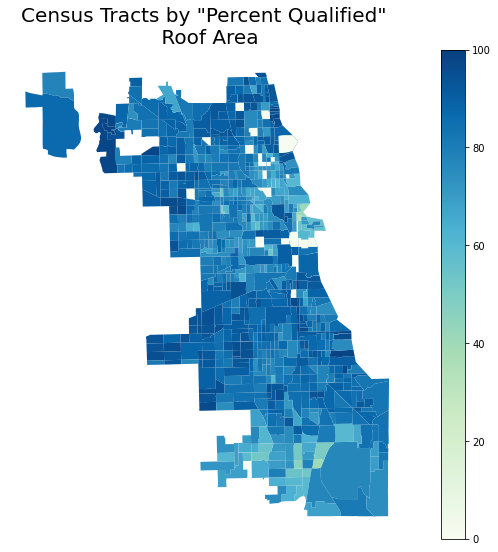

In [61]:
fig, ax = plt.subplots()
chi_econ_df.plot(ax=ax, column='percent_qualified', cmap='GnBu', legend=True)
# chicago.center.plot(ax=ax, color='y')
ax.set_title('Census Tracts by \"Percent Qualified\" \n Roof Area', fontsize=20)
ax.set_axis_off()
plt.show()

# Get the Maximum Number of Homogeneous Regions (i.e. Max-p Regions)

In [168]:
import sys
from shapely import wkt
from spopt.region.skater import Skater
from spopt.region import RegionKMeansHeuristic
import libpysal
from libpysal.examples import load_example
from sklearn.metrics import pairwise as skm

from spopt.region import MaxPHeuristic as MaxP
import matplotlib
import spopt


RANDOM_SEED = 123456

In [169]:
df = chi_econ_df[chi_econ_df['COMMUNITY AREA NAME'] != "O'Hare"]

In [170]:
attrs_name = ['HARDSHIP INDEX', 'percent_qualified', 'commarea_n']#, 'percent_qualified', 'PER CAPITA INCOME ', 'commarea_n']
attrs_name

['HARDSHIP INDEX', 'percent_qualified', 'commarea_n']

In [177]:
N_regions = 5
w = libpysal.weights.Rook.from_dataframe(df)
np.random.seed(RANDOM_SEED)
model = RegionKMeansHeuristic(df[attrs_name].values, N_regions, w)
model.solve()

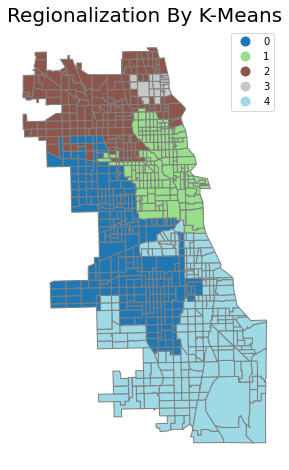

In [178]:
df["reg_k_mean"] = model.labels_
ax = df.plot(
    column="reg_k_mean",
    categorical=True,
    cmap="tab20",
#     cmap="viridis",
    figsize=(12,8),
    legend=True,
    edgecolor="grey")
ax.set_title('Regionalization By K-Means', fontsize=20)
ax.set_axis_off()

In [179]:
df[['reg_k_mean','HARDSHIP INDEX', 'percent_qualified']].groupby(by='reg_k_mean').mean().sort_values(by='HARDSHIP INDEX')

,HARDSHIP INDEX,percent_qualified
reg_k_mean,,
1,9.577778,63.966605
3,22.391304,71.625336
2,32.343195,81.520786
4,49.497696,78.141344
0,79.650602,83.519894


In [180]:
cmap = matplotlib.cm.get_cmap('tab20')
cmap(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

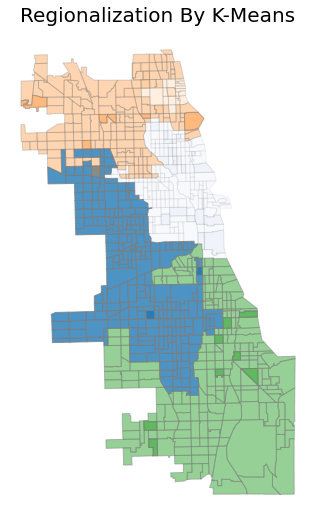

In [181]:
fig, ax = plt.subplots()
cmap = matplotlib.cm.get_cmap('tab20')
for k in range(N_regions):
    df["reg_k_mean"] = model.labels_
    sub_df = df[df['reg_k_mean'] == k]
    a = (sub_df['HARDSHIP INDEX'].mean())/100
    sub_df.plot(ax =ax,
        column="reg_k_mean",
        categorical=True,
        color=cmap(k),
    #     cmap="viridis",
        figsize=(12,8),
        legend=False,
        edgecolor="grey",
        alpha = a)
ax.set_title('Regionalization By K-Means', fontsize=20)
ax.set_axis_off()